#  MINF4538 Big Data Analytics Term Project FS2020

## Focus: Supervised Machine Leaning

Group Members: Vasiliki Arpatzoglou, Clive Charles Javara, Carla M.A. Mirabella, Syed Shahvaiz Ahmed

Topic: Tackling a Binary Mushroom Classification through supervised machine learning techniques

Dataset Link: https://www.kaggle.com/uciml/mushroom-classification

### Motivation for the choosen dataset:

The primary motivation to go forward with this dataset is that it allows us to fully apply the data science pipeline as studied in the lecture "Translation to Data Science". 

## Data Set Descrpition:

Background: This dataset contains attributes about 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom, and was donated to the UCI Machine Learning repository nearly 30 years ago. The dataset was originally taken from The Audubon Society Field Guide to North American Mushrooms (1981).

Content: There are 8124 mushroom specimen in the dataset, each categorised around 23 different attributes. The most relevant one for an everyday consumer is the first class, which distinguishes edible from poisonous mushrooms. It is worth noticing that the poisonous class is made up of two subgroups: confirmed poisonous mushrooms, and those whose edibility is uncertain. As you can see below in the "Intermediate Data Description", the mean of this class is .48, implying that there are more edible mushrooms. The other characteristics are about appearence, smell, texture and geographical details.

Source: This dataset was originally donated to the UCI Machine Learning repository, and has also been used for past research: (https://archive.ics.uci.edu/ml/datasets/Mushroom). 
We downloaded it from Kaggle: https://www.kaggle.com/uciml/mushroom-classification.

## Description of Variables in the dataset

- Attribute Information: (classes: edible=e, poisonous=p)
- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- bruises: bruises=t, no=f
- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- gill-attachment: attached=a, free=f
- gill-spacing: close=c ,crowded=w
- gill-size: broad=b, narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e, tapering=t
- stalk-root: bulbous=b, club=c, equal=e, rooted=r, missing=?
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- veil-type: partial=p
- veil-color: brown=n, orange=o, white=w, yellow=y
- ring-number: none=n, one=o, two=t
- ring-type: evanescent=e, flaring=f, large=l, none=n, pendant=p
- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Project Overview: 

1. Data Overview
    - Missing Value Identification
2. Data Manipulation and Cleaning
    - 2.1 Categorical Assignment to all features
        - 2.1.1 Handling special values
        - 2.1.2 Intermediate Data Description
        - 2.1.3 Identifying redundant features
    - 2.2 One-hot encoding mechanism
    - 2.3 Univariate Selection
    - 2.4 Feature Importance
3. Exploratory Data Analysis
    - 3.1 Plots
4. Data preprocessing
    - 4.1 Pricipal Component Analysis
    - 4.2 Defining functions for visualizations
5. Model Building
    - 5.1 K Nearest Neigbour
    - 5.2 Logistic Regression 
    - 5.3 Support Vector Machine
    - 5.4 Decision Trees
    - 5.5 Random Forest
    - 5.6 Neural Network
6. Model Comparison
7. Conclusion

## Instructions to Run the file:

Please read the Readme.txt file that is submitted with this project. It carries the instructions to run the file in a flawless manner. After following through the steps indicated in the Readme.txt, run the first two lines of this notebook to ensure that all relevant libraries are installed before moving forward with running all cells all together. If some dependencies are still not satisfied then please install them manually either with conda or pip (depending on interface). Once the 2nd line of this notebook shows no errors then you can run all cells below (using the option 'Run all below' under 'Cell' in Jupyter Notebook).

In the case that the user doesn't want to run the whole notebook then it might be the case that some visualizations will not work once the file is downloaded to a new machine (incomplete rendering/plots are not saved). So it is pertinent that you run the notebook to view all plots. 

Since the notebook carries 6 different classification models the average time for the whole notebook to run on CPU at 1.6GHz with 8192MB RAM is roughly 15 mins. On GPU, the performance significantly varies between 8-10 mins. 

#### This piece of code below allows us to disable the autoscroll function of the IPython notebook. It can be hashed out if the user wishes to avoid going through all the EDA plots in one sitting.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Importing all the relevant packages for Exploratory data analysis and Model development.

%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# General math, csv and plotting modules.
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

pylab.rcParams['figure.figsize'] = (10, 5)

# Visualization Libraries
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

# Loading the required Machine Learning Libraries 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from yellowbrick.classifier import DiscriminationThreshold
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dropout
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import average_precision_score
import itertools

# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shahvaiz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


## 1. Data Overview

In [3]:
# Reading the csv file that contains the primary data.
mushrooms=pd.read_csv('mushrooms.csv')
# Showing few rows of the dataset
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Number of Rows and Columns in the dataset
print ("Rows and Columns: ",mushrooms.shape)
# Number of Features that we have to deal with
print ("\n Number of Features : \n",mushrooms.columns.tolist())
# To track categorical, binary and textual data
print ("\nUnique values : ")
display(mushrooms.nunique())

Rows and Columns:  (8124, 23)

 Number of Features : 
 ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Unique values : 


class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### 1.1 Missing value Identification

In [5]:
## To check missing values in terms of spaces.
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

missingvalue = 0
missingcolumn = []
for i in mushrooms.columns:
    for j in mushrooms[i].tolist():
        if  j == ' ':
            missingvalue += 1
            missingcolumn.append(i)
print("Number of missing values in spaces are: {}".format(missingvalue))
print("Feature name which contains missing values in spaces: {}".format(unique(missingcolumn)))

## To check missing values in terms of null or nan. 
print("Number of missing values in terms of null or nan: {}".format(mushrooms.isnull().sum().values.sum()))

Number of missing values in spaces are: 0
Feature name which contains missing values in spaces: []
Number of missing values in terms of null or nan: 0


## 2. Data Manipulation

#### In this dataset we are dealing with 22 categorical variables in terms of text. We need to transform them into numerical values for further EDA and model building. We generate a label encoding scheme for mapping each category to a numeric value.

<i>Encoding options</i>: 

- 1. Convert into integers. Assign categorical values to each feature.
- 2. one-hot encoding. This will increase the feature space from 22 to 116. (This inherently induces a Dimensionality problem that will cause overfitting [resolved through PCA]) 

### 2.1 Categorical assignment to feature space.

In [6]:
# A class which allows us to print in Bold
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Encoding numerical values to each feature. 
label_encoder = LabelEncoder()
column_names=list(mushrooms.columns)

mappings_list = []
for i in range(len(mushrooms.columns.tolist())): 
    df = mushrooms.iloc[:,i]
    df = label_encoder.fit_transform(df)
    mappings = {index: label for index, label in 
                      enumerate(label_encoder.classes_)}
    mappings_list.append([mappings])

# Creating a dataframe which records all the mappings. 
mappings_df = pd.concat([pd.DataFrame(mushrooms.columns.tolist(), columns = ['Features']),
             pd.DataFrame(mappings_list, columns = ['Mappings'])], axis =1 , sort = False)
display(mappings_df)

# Creating an encoded data frame from the previous one (to be used for model building). 
df = mushrooms.apply(label_encoder.fit_transform)

,Features,Mappings
0,class,"{0: 'e', 1: 'p'}"
1,cap-shape,"{0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}"
2,cap-surface,"{0: 'f', 1: 'g', 2: 's', 3: 'y'}"
3,cap-color,"{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p..."
4,bruises,"{0: 'f', 1: 't'}"
5,odor,"{0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n..."
6,gill-attachment,"{0: 'a', 1: 'f'}"
7,gill-spacing,"{0: 'c', 1: 'w'}"
8,gill-size,"{0: 'b', 1: 'n'}"
9,gill-color,"{0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n..."


An acute observation at this stage is in row 11 where we observe that in stalk-root feauture we have some values with ? symbol. This might become a problem in later analyses (where we use numpy) so we need to deal with them.

#### 2.1.1 Handling special values

#### Further exploring the stalk mushroom variable where it takes the value '?'

In [7]:
stalk_root_specialvalue = missing_out=np.count_nonzero(df['stalk-root'] == 0)
print('Number of ? in stalk root mushrooms is: {}'.format(stalk_root_specialvalue))
print('Total percentage of ? rows in dataset: {:.2f}'.format(stalk_root_specialvalue/len(df['stalk-root'])*100 ))

Number of ? in stalk root mushrooms is: 2480
Total percentage of ? rows in dataset: 30.53


If we drop the rows which have ? in the stalk-root feature then essentially we will be dropping around 30% of our dataset. This doesn't seem like a feasible option. Since the ? is already encoded as a 0 in the feature, thus it can be used as a valid variable in further model development 

#### 2.1.2 Intermediate Data Description

The descriptive statistics is available below.

For the feature class, the mean of .48 and a median of 0 indicate that the majority of mushrooms are edible. Given that the poisonous category also comprises mushrooms whose edibility is uncertain, the real number is probably higher. Gill-attachment is predominantly free, as indicated by the .97 mean. Around 50% of all veils are white and 100% of all specimen have a partial veil type. More than 50% of the population of all specimen is scattered, as can be seen by the mean, median and upper quartile of population.

In [8]:
# This is done to check if there are other abnormalities that need to be accounted for before EDA
display(df.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


We observe that the column __veil-type__ has the same mean, std and min values of 0. Thus we further try to analyze as to what is happening.

#### 2.1.3 Identifying redundant features

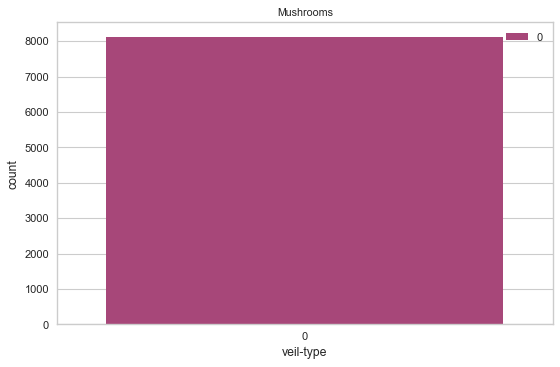

In [9]:
# Looking at the veil type variable
# create plot
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
g = sns.countplot(x = df['veil-type'],hue=df['veil-type'].values, data = df, palette = 'magma')
sns.set_context('paper')
plt.title('Mushrooms')
plt.show()

In [10]:
# As noticed in the intermediate data description and the plot above, we find that veil-type indeed has all zeros
print('Number of partial type mushrooms {zero_out}, number of universal type mushrooms {pos_out} '.format(
        zero_out=np.count_nonzero(df['veil-type'] == 0),
        pos_out=np.count_nonzero(df['veil-type'] == 1)
      ))

Number of partial type mushrooms 8124, number of universal type mushrooms 0 


Since all values of veil type is partial , we can drop this feature from our analysis as this will bring no further insight in our analysis.

In [11]:
df = df.drop(columns=['veil-type'])

### 2.2 One-hot encoding mechanism

In [12]:
# Getting all dummies through one-hot encoding. This will be used for model building.
X = df.iloc[:,1:]
X = pd.get_dummies(X)

# Getting the target variable
y = df.iloc[:,0]
y = label_encoder.fit_transform(y)

### 2.3 Univariate Selection
This is a statistical test also know as univariate Selection that displays how strong the relationship between the individual features and the target output is.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The code below uses the chi-squared (chi²) statistical test for non-negative features to select best features from the Dataset.

In [13]:
X_feature = df.iloc[:,1:]
y_target = df.iloc[:,0]
#apply SelectKBest class display features with their score
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1,sort=True)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,cap-shape,17.508364
1,cap-surface,214.068544
2,cap-color,11.511382
3,bruises,1194.277352
4,odor,75.910163
5,gill-attachment,3.505447
6,gill-spacing,826.795274
7,gill-size,1636.606833
8,gill-color,5957.764469
9,stalk-shape,36.594105


### 2.4 Feature Importance
Feature importance give a score for each feature in the data: the higher the score, the more important or relevant the feature is for the output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers

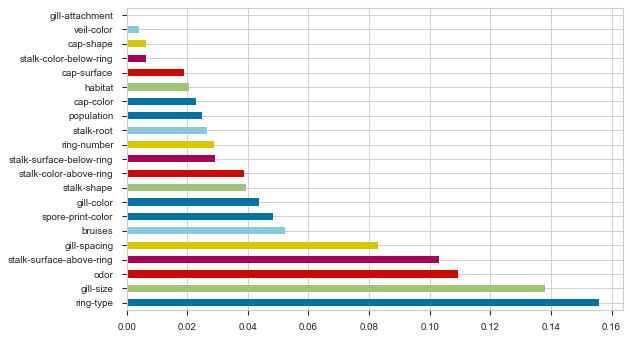

In [14]:
model = ExtraTreesClassifier()
model.fit(X_feature,y_target)
#plot graph of feature importances for better visualization
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
ft_importances = pd.Series(model.feature_importances_, index=X.columns)
ft_importances.nlargest(21).plot(kind='barh')
plt.show()

From the feature importance we can see that gill size and having bruises are good predictors of edibility

## 3. Exploratory Data Analysis

We have a feature set of 22 columns that need to be explored in their connection with edible and poisonous mushrooms. We further check for class imbalance in the types of mushrooms

In [15]:
#Separating the features and target variable for EDA
X_EDA = df.iloc[:,1:]
y_EDA = df.iloc[:,0]

In [16]:
#check for class imbalance
print('Number of edible mushrooms {zero_out}, number of poisonous mushrooms {pos_out} '.format(
        zero_out=np.count_nonzero(y_EDA == 0),
        pos_out=np.count_nonzero(y_EDA == 1)
      ))

Number of edible mushrooms 4208, number of poisonous mushrooms 3916 


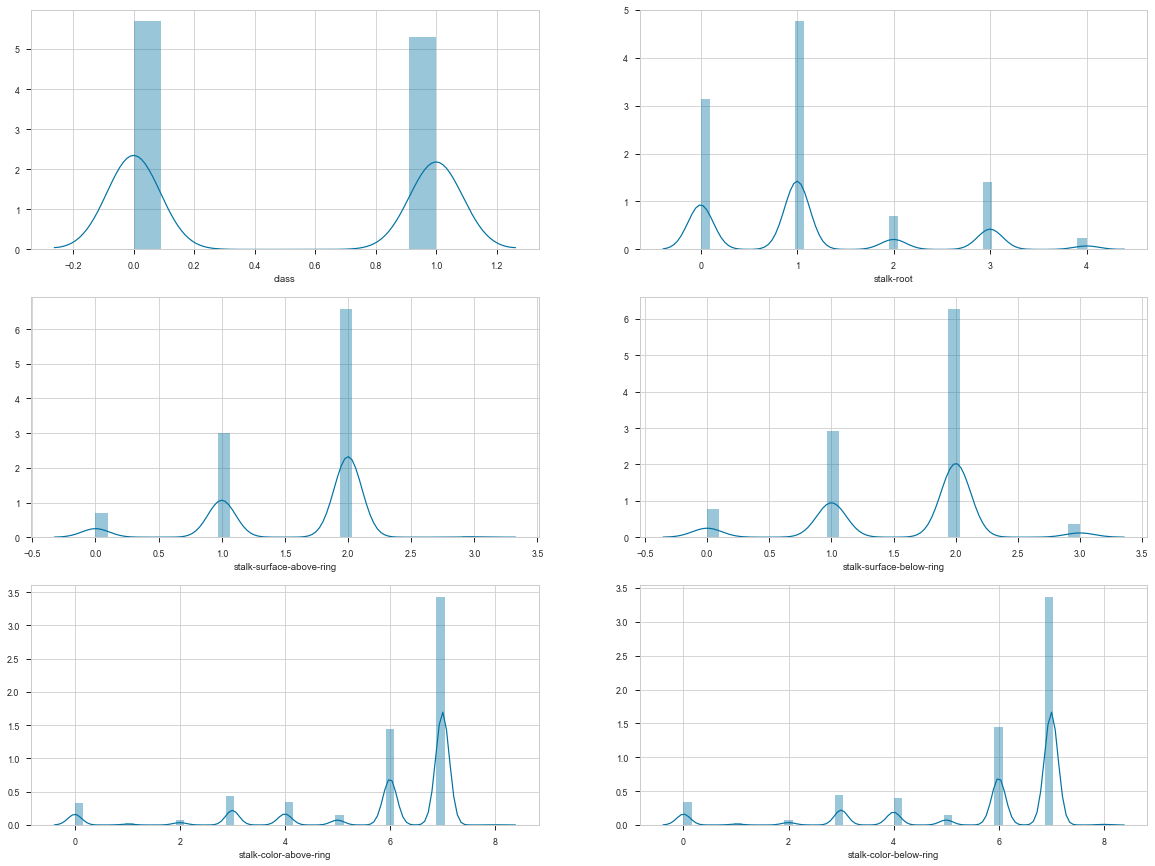

In [17]:
# Checking class balance
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']
data = df[cats]
for i, axis in enumerate(ax.flat):
    sns.distplot(data.iloc[:, i], ax = axis)

As we see, from both the numerical output and the plot, the dataset is quite balanced. In plots 3 and 4 we see that smooth mushrooms are the most abundant, and that having a surface of a certain type above the ring is very highly correlated with having the same type below the ring. The same is true for colors, where the most frequently observed one is pink.

### 3.1 Plots 

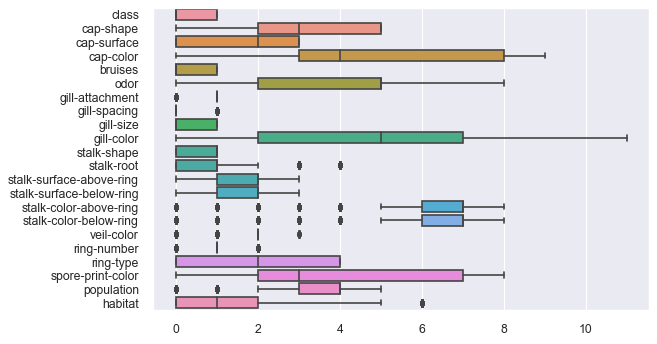

In [18]:
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.set(rc={'figure.figsize':(15.0,10.0)})
sns.boxplot(data=df,orient="h")

As mentioned above, we see in these plots as well that surface types are highly correlated, as are color types. As a matter of fact, they have the same distribution. Moreover, color type is the feature with most outliers. The gill color is the feature with the widest range, has the same lower and upper quartiles as spore print color, but has a much heavier upper tail. The distribution of spore print color is quite positively skewed, while gill color is slightly negatively skewed. Finally, ring type and cap surface have the same median, but quite different distributions, with the former being symmetric.

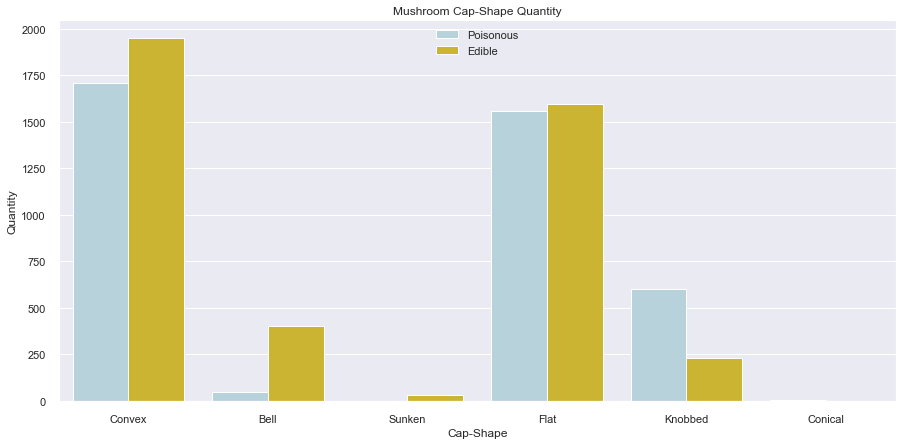

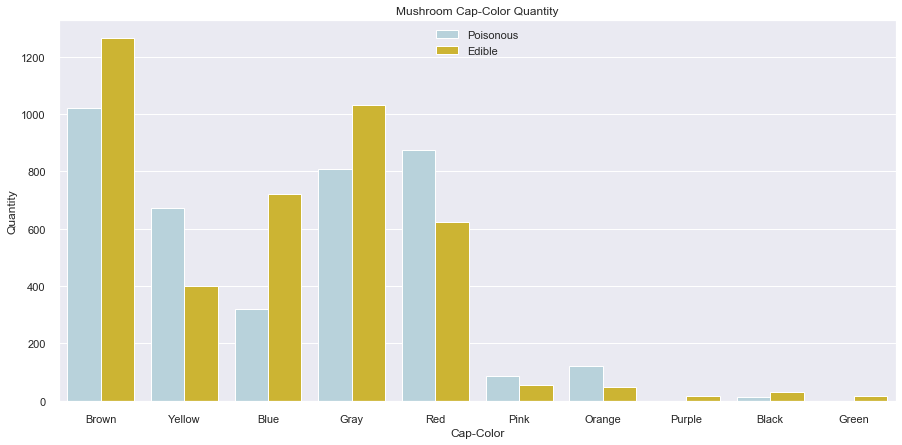

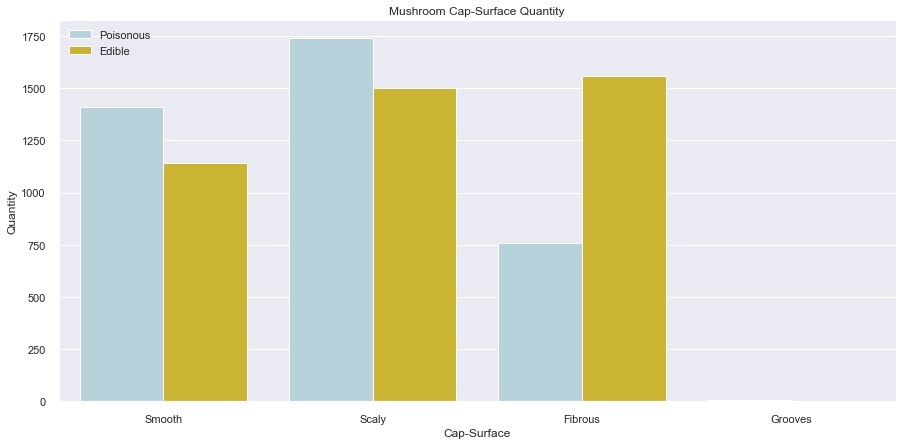

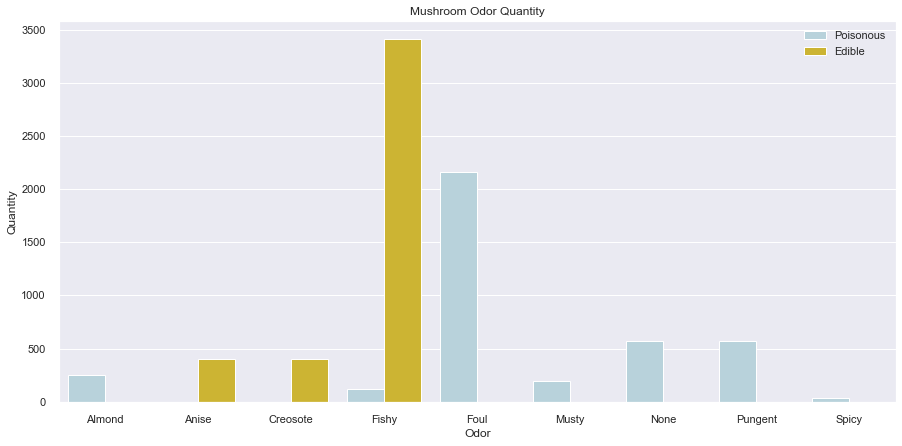

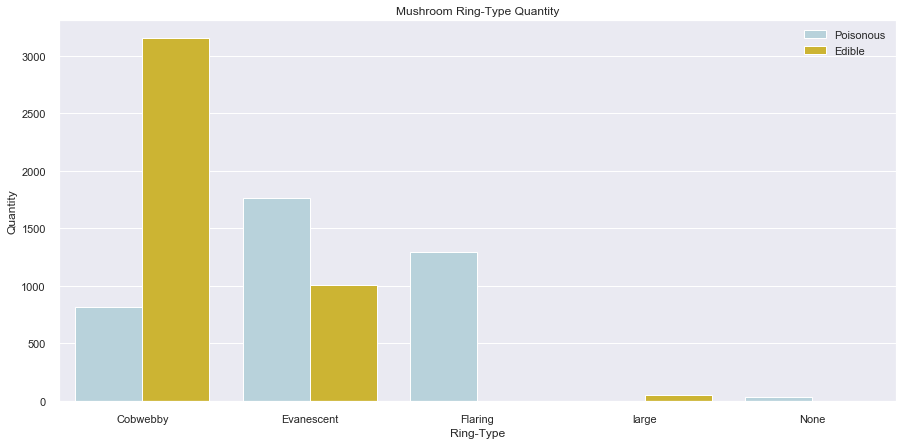

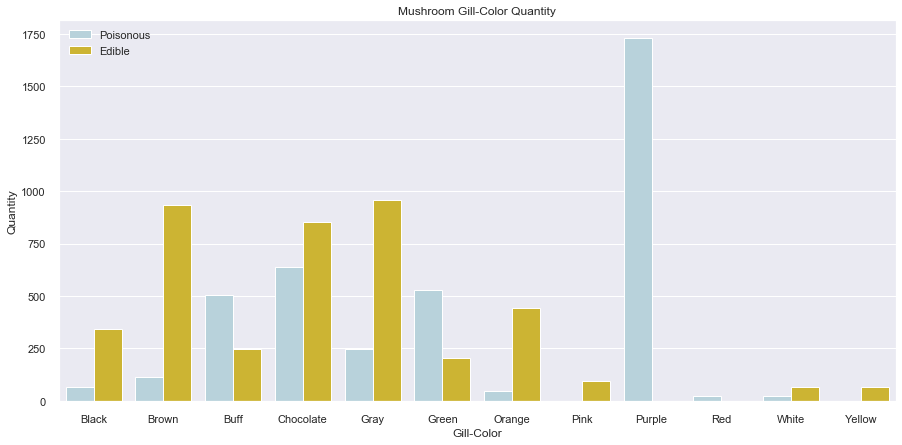

In [19]:
# Defining a function for all sorts of plotting.
def plot_col(col, hue=None, color=['lightblue','gold'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=mushrooms, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)
        
# Cap Shape visualization
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('Convex', 'Bell', 'Sunken', 'Flat', 'Knobbed', 'Conical')
plot_col(col='cap-shape', hue='class', labels=labels)

# Cap Color Visualization
color_dict = {"Brown":"n","Yellow":"y", "Blue":"w", "Gray":"g", "Red":"e","Pink":"p","Orange":"b", "Purple":"u", "Black":"c", "Green":"r"}
plot_col(col='cap-color', hue='class', labels=color_dict)

# Cap Surface Visualization
surface_dict = {"Smooth":"s", "Scaly":"y", "Fibrous":"f","Grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

# Odor Visualization
odor_dict = {"Almond":"a","Anise":"l","Creosote":"c","Fishy":"y","Foul":"f","Musty":"m","None":"n","Pungent":"p","Spicy":"s"}
plot_col(col='odor', hue = 'class', labels=odor_dict)

# Ring type Visualization
ring_dict = {'Cobwebby': 'c', 'Evanescent': 'e', 'Flaring': 'f', 'large': 'l', 'None': 'n', 'Pendant': 'p', 'Sheathing': 's', 'Zone': 'z'}
plot_col(col = 'ring-type', hue = 'class', labels = ring_dict)

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
# Gill color Visualization
gill_dict ={'Black': 'k', 'Brown': 'n', 'Buff': 'b', 'Chocolate': 'h', 'Gray': 'g', 'Green': 'r', 'Orange': 'o', 'Pink': 'p', 'Purple': 'u', 'Red': 'e', 'White': 'w', 'Yellow': 'y'}
plot_col(col = 'gill-color', hue = 'class', labels = gill_dict)

We decided to also add histograms to our analysis, in order to be able to tell something about the shape of the distributions. 

In the first plot, we see some imbalance in the bell- and knobbed- shaped caps. There are much more edible mushrooms that are bell shaped as there are poisonous. The opposite is the case for knobbed-shaped mushrooms: poisonous ones are twice as many as edible ones.

In the second plot we see the cap color distribution. Brown and gray-capoed mushrooms are the most widespread. At around 4000 specimen, they represent about 50% of the whole dataset. For both colors, edible mushrooms are about 10% more than poisonous ones, compared to the total of that color. 

In the fourth plot we see that all mushrooms with a foul odor are poisonous. Surprisingly however, around 97% of fish-smelling mushrooms are edible.

Finally, it is completely unsafe to eat mushrooms with purple gills. on the other hand, pink and yellow gills are safe to eat, but not very common in the sample. 

## 4. Data Preprocessing

In [20]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
#i split to 40% in order to reduce overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### 4.1 PCA

In order to avoid redundant information of features, we generate a new set of variables (principal components). Each principal component is a linear combination of the original variables. We know that principal components explain a part of the variance. Typically, we want the explained variance to be between 95–99%. So we experimented by setting the n_components=0.95 and n_components=0.99. Unfortunately, we observed that all the classifiers still overfit and we could not overpass the dimensionality problem. After setting n_components=2, we observe that the PCA plot shows 2 separate clusters of samples and almost clearly distinguish between poisonous and not poisonous. Also, the explained variance of only 2 components is 100% so there is no need to add another component.

Explained variance: 1.0


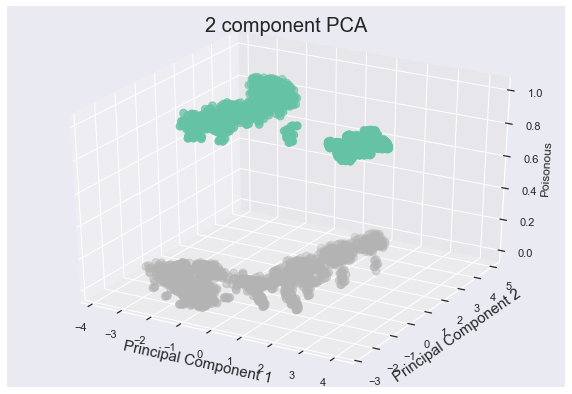

In [22]:
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca.fit(X_train)
int_y_train = pd.DataFrame(y_train, columns= ["Poisonous"])
principalDf = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, int_y_train], axis = 1)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel("Poisonous")
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
ax.scatter3D(finalDf['principal component 1'], finalDf['principal component 2'], finalDf["Poisonous"],
             c = finalDf["Poisonous"], cmap="Set2_r",s = 60)
ax.grid()

print('Explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

### 4.2  Defining functions for visualizations

In [23]:
# Building some visualization functions to be used for each model as well as model comparisions
def roc_conf_plot(classifier, x_train = None, y_train = None, x_test = None,  y_test = None):
    
    # Fitting the model
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    roc_score = roc_auc_score(y_test, y_pred)
    prob = classifier.predict_proba(x_test)
    
    # Setting traces for the ROC plot
    fpr,tpr,thresholds = roc_curve(y_test,prob[:,1])
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(roc_score),
                        line = dict(color = ('purple'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('red'),width = 2,
                        dash = 'dot'))
    Layout = go.Layout(dict(title = "Receiver Operator Characteristics Curve",
                           showlegend = False,
                           xaxis = dict(title = "False positive rate",
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "True positive rate",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2)
                           )
                           )
    data = [trace1, trace2]
    figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
    fig = go.Figure(data= data, layout = Layout)
    py.iplot(fig)
    print("Area under curve : ", roc_score)

# Generates the threshold plot for the specified model
def threshold_plot(algorithm, x, y):
  figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
  visualizer = DiscriminationThreshold(algorithm)
  visualizer.fit(x,y)
  visualizer.poof()

# Creating row table for the metric comparision of each model.
def model_metric(model, x_train, y_train, x_test, y_test, name):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    roc = roc_auc_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    row_df = pd.DataFrame({
                       "Model"           : [name],
                       "Accuracy_score"  : [acc],
                       "Recall_score"    : [recall],
                       "Precision"       : [prec],
                       "f1_score"        : [f1],
                       "Area_under_curve": [roc],
                       "Kappa_metric"    : [kappa],
    })
    return row_df

## 5. Model Building - Classifiers  
#### Machine Learning Algorithms / Statistical Models

In the following Section, we will use different methods to classify our data. We will also use Confusion Matrices and curves such as ROC and Precision-Recall to evaluate our results. 

The area under the receiver operating characteristic curve (ROC AUC) shows the performance of the classification model at all thresholds. It plots the TPR, i.e. recall, against the FPR. 

Precision-Recall curves give us the trade-off between TPR and the positive predictive value for a predictive model. The positive predictive value of a model is the ratio between true positives and total number of cases classified as positives (the sum of true and false positives), and it is also called precision. Recall is the ratio between true positives and actual number of positives, i.e. TP plus false negatives. These curves are appropriate for imbalanced datasets, which is not the case for our dataset.

The F1 score gives the skill of the model for a specific probability threshold and is the harmonic mean of Precision and Recall. Given that this score is high but a bit lower than AUC, we can say that the threshold was chosen properly.

We use a random seed to initialize a pseudorandom number generator in order to preserve reproducibility.

In [24]:
import random
random.seed(30)

### 5.1 k - Nearest Neighbours

In [25]:
grid = {"n_neighbors":[1,2,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(X_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

Tuned hpyerparameters :(best parameters)  {'n_neighbors': 6}


In [26]:
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train,y_train)
y_pred_knn = model_KNN.predict(X_test)

0.9013539651837524
0.9688149688149689
0.939076923076923
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.97      0.90      0.93      1551

    accuracy                           0.94      3250
   macro avg       0.94      0.94      0.94      3250
weighted avg       0.94      0.94      0.94      3250



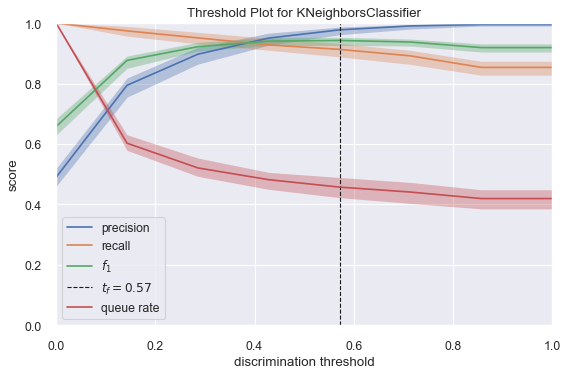

Area under curve :  0.937433898424719


<Figure size 640x400 with 0 Axes>

In [27]:
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))

threshold_plot(model_KNN, X_train, y_train)
roc_conf_plot(model_KNN, X_train, y_train,  X_test, y_test)
KNN_model = model_metric(model_KNN, X_train, y_train, X_test, y_test, "K - Nearest Neighbours")

The AUC for the k-NN algorithm is 93.7%. This means that k-NN correctly classifies true positives and true negatives with a 93.7% probability, which means there is a poissibility of around 6.3% of  type 1 and type 2 errors (false positives and negatives). 

A feature of AUC is that it is classification-threshold-invariant. However, this is not the best feature for our classification purposes, given that we want to prioritise minimising the number of false edibles over false poisonous, because it is  dangerous to deem edible a mushroom that is in reality poisonous, while a false poisonous mushroom poses no threat to one's health. 

### 5.2 Logistic Regression

Before training Logistic Regression, we perform a cross-validation with hypertuning in order to further avoid the overfitting and find the best hyperparameter. Also, we scale the data to the range between 0 and 1 (MinMax Scaler). In general, the speed of updating each feature depends on its scale, and in the end some coefficients are closer to the optimum than the others. Scaling softens this, because coefficients are now at the same scale and update roughly at the same speed.

In [28]:
# Defining a separate function for Logistic Regression to check the best parameters
def logistic_reg(x_t = None, y_t = None):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    parameters= {'solver':('lbfgs', 'liblinear', 'sag', 'saga'), 'fit_intercept':(True,False),'C':[1e-2,1e-1,1e0,1e1,1e2,3,10]}
    logreg = LogisticRegression(max_iter = 1000000)
    logreg_cv = GridSearchCV(logreg,parameters)

    scores=[]
    recall_scores=[]
    precision_scores=[]

    #cross validation to find the best hyperparameter
    for train_index, test_index in kfold.split(X, y):
        x_t, x_tst = X[train_index], X[test_index] 
        y_t, y_tst = y[train_index], y[test_index]
        #classifier
        logreg_cv.fit(x_t,y_t)
        print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
        #print("Accuracy :",svclassifier_cv.best_score_)
        y_pred = logreg_cv.predict(x_tst)
        scores.append(logreg_cv.score(x_tst,y_tst))
        print(recall_score(y_tst, y_pred))
        recall_scores.append(recall_score(y_tst,y_pred))
        print(precision_score(y_tst, y_pred))
        precision_scores.append(precision_score(y_tst,y_pred))
        
logistic_reg(X_train, y_train)

Tuned hyperparameters :(best parameters)  {'C': 100.0, 'fit_intercept': False, 'solver': 'liblinear'}
0.9413265306122449
0.9449423815620999
Tuned hyperparameters :(best parameters)  {'C': 100.0, 'fit_intercept': False, 'solver': 'liblinear'}
0.9540229885057471
0.9576923076923077
Tuned hyperparameters :(best parameters)  {'C': 100.0, 'fit_intercept': False, 'solver': 'liblinear'}
0.9412515964240102
0.9497422680412371
Tuned hyperparameters :(best parameters)  {'C': 100.0, 'fit_intercept': False, 'solver': 'liblinear'}
0.9476372924648787
0.9321608040201005
Tuned hyperparameters :(best parameters)  {'C': 100.0, 'fit_intercept': False, 'solver': 'liblinear'}
0.9553001277139208
0.9432534678436317


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_log = scaler.fit_transform(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.4, random_state=0)

model_LCV = LogisticRegression(solver='sag', fit_intercept=False, penalty = 'l2',C=100, max_iter=1000000)
model_LCV.fit(X_train_log, y_train_log)
y_pred_LCV = model_LCV.predict(X_test_log)

0.9568020631850419
0.9580374435119432
0.9593846153846154
[[1634   65]
 [  67 1484]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.96      0.96      0.96      1551

    accuracy                           0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



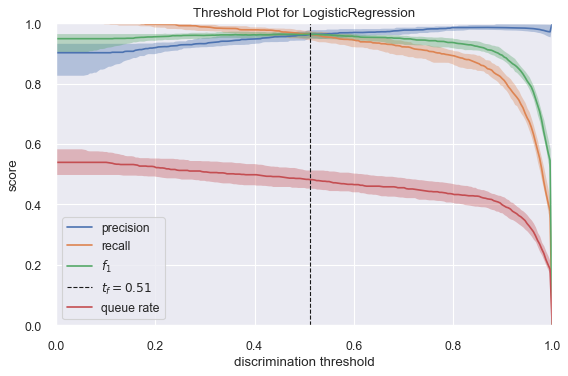

Area under curve :  0.9592721322399604


<Figure size 640x400 with 0 Axes>

In [30]:
print(recall_score(y_test_log, y_pred_LCV))
print(precision_score(y_test_log, y_pred_LCV))
print(accuracy_score(y_test_log, y_pred_LCV))
print(confusion_matrix(y_test_log, y_pred_LCV))
print(classification_report(y_test_log,y_pred_LCV))

threshold_plot(model_LCV, X_train_log, y_train_log)
roc_conf_plot(model_LCV, X_train_log, y_train_log,  X_test_log, y_test_log)
LCV_model = model_metric(model_LCV, X_train_log, y_train_log, X_test_log, y_test_log, "Logistic Regression CV")

### 5.3 SVM

In [31]:
parameters = {'kernel':( 'linear','rbf','sigmoid'), 'C':[1e-2,1e-1,1e0,1e1,1e2,3,10]}
svclassifier = SVC()
svclassifier_cv = GridSearchCV(svclassifier,parameters)
svclassifier_cv.fit(X_train,y_train)
print("Tuned hyperparameters :(best parameters) ",svclassifier_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'C': 100.0, 'kernel': 'rbf'}


Above we explore three grids with a linear kernel, a RBF kernel and a sigmoid kernel with the specified regularization parameters C, which are inversely proportional to the strength of the regularization. This allows us to find the best combinations of parameters to use for our C-Support Vector Classification.

In [32]:
model_SVC= SVC(C=100, kernel="rbf",probability=True)
model_SVC.fit(X_train,y_train)
y_pred_SVC = model_SVC.predict(X_test)

In [33]:
print(recall_score(y_test, y_pred_SVC))
print(precision_score(y_test, y_pred_SVC))
print(accuracy_score(y_test, y_pred_SVC))
print(confusion_matrix(y_test,y_pred_SVC))
print(classification_report(y_test,y_pred_SVC))

"""Creating the ROC curve for SVM separately for less computation time."""
roc_score = roc_auc_score(y_test, y_pred_SVC)
prob = model_SVC.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,prob[:,1])
trace1 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(roc_score),
                    line = dict(color = ('purple'),width = 2),
                   )
trace2 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('red'),width = 2,
                    dash = 'dot'))
Layout = go.Layout(dict(title = "Receiver Operator Characteristics Curve",
                       showlegend = False,
                       xaxis = dict(title = "False positive rate",
                                     domain=[0, 0.6],
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(title = "True positive rate",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2)
                       )
                       )
data = [trace1, trace2]
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
fig = go.Figure(data= data, layout = Layout)
py.iplot(fig)

# To avoid a longer processing time the threshold plot for SVM is not plotted. 
# threshold_plot(model_SVC, X_train, y_train)

# Combining metrics for model comparison
SVM_model = pd.DataFrame({
                       "Model"           : ["Support Vector Machine"],
                       "Accuracy_score"  : [accuracy_score(y_test,y_pred_SVC)],
                       "Recall_score"    : [recall_score(y_test,y_pred_SVC)],
                       "Precision"       : [precision_score(y_test,y_pred_SVC)],
                       "f1_score"        : [f1_score(y_test,y_pred_SVC)],
                       "Area_under_curve": [roc_auc_score(y_test, y_pred_SVC)],
                       "Kappa_metric"    : [cohen_kappa_score(y_test,y_pred_SVC)],
})

0.9103803997421018
0.9658002735978112
0.9418461538461539
[[1649   50]
 [ 139 1412]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1699
           1       0.97      0.91      0.94      1551

    accuracy                           0.94      3250
   macro avg       0.94      0.94      0.94      3250
weighted avg       0.94      0.94      0.94      3250



<Figure size 640x400 with 0 Axes>

### 5.4 Decision Trees

Here again we tuned the hyperparameters by a Grid search and find that the best split criterion is gini. However, comparing it with entropy, we do not see a significant difference. We find that most of the goodness of fit is driven by the maximum depth. This means that taking siple probabilities vs. log base 2 of such probabilities does not make a big difference in the classification

In [34]:
parameters = {'criterion':('gini','entropy'),'max_depth': range(1,20,2)}
dectree = DecisionTreeClassifier()
dectree_cv = GridSearchCV(dectree,parameters)
dectree_cv.fit(X_train,y_train)
print("Tuned hyperparameters :(best parameters) ",dectree_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 7}


In [35]:
model_DT = DecisionTreeClassifier(criterion='gini',max_depth=7)
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

0.9142488716956803
0.9447035309793471
0.9335384615384615
[[1616   83]
 [ 133 1418]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1699
           1       0.94      0.91      0.93      1551

    accuracy                           0.93      3250
   macro avg       0.93      0.93      0.93      3250
weighted avg       0.93      0.93      0.93      3250



Area under curve :  0.9332868843469574


<Figure size 640x400 with 0 Axes>

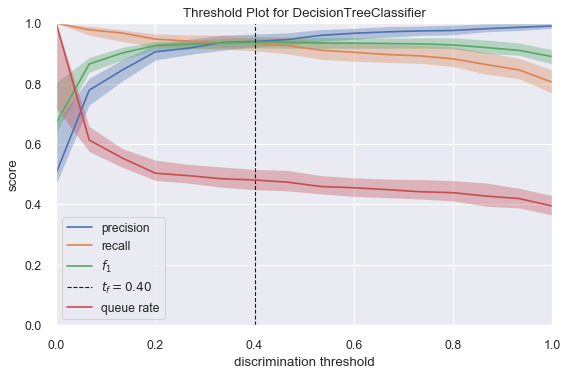

In [36]:
print(recall_score(y_test, y_pred_DT))
print(precision_score(y_test, y_pred_DT))
print(accuracy_score(y_test, y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))

roc_conf_plot(model_DT, X_train, y_train, X_test, y_test)
threshold_plot(model_DT, X_train, y_train)
DT_model = model_metric(model_DT, X_train, y_train, X_test, y_test, "Decision Tree")

### 5.5 Random Forest

RF: We tuned the parameters here as well, so that comparability across models can be easier. Had we tuned parameters only for some models, we would not be able to discern whether such models perform better because of the optimised parameters, or because they are better for the task at hand.

In [37]:
parameters= {'n_estimators':[10,50,100,500,1000],'max_depth': range(1,20,2)}
RFC = RandomForestClassifier()
RFC_cv = GridSearchCV(RFC,parameters)
RFC_cv.fit(X_train,y_train)
print("Tuned hyperparameters :(best parameters) ",RFC_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 1000}


In [38]:
model_RFC = RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=1)
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)

0.9090909090909091
0.9572301425661914
0.9372307692307692
[[1636   63]
 [ 141 1410]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1699
           1       0.96      0.91      0.93      1551

    accuracy                           0.94      3250
   macro avg       0.94      0.94      0.94      3250
weighted avg       0.94      0.94      0.94      3250



Area under curve :  0.9360051367114347


<Figure size 640x400 with 0 Axes>

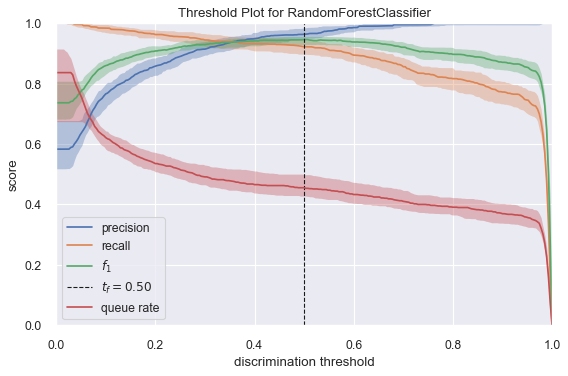

In [39]:
print(recall_score(y_test, y_pred_RFC))
print(precision_score(y_test, y_pred_RFC))
print(accuracy_score(y_test, y_pred_RFC))
print(confusion_matrix(y_test,y_pred_RFC))
print(classification_report(y_test,y_pred_RFC)) 

roc_conf_plot(model_RFC, X_train, y_train, X_test, y_test)
threshold_plot(model_RFC, X_train, y_train)
RF_model = model_metric(model_RFC,X_train,y_train,X_test,y_test, "Random Forest")

### 5.6 Neural Network

In [40]:
# NN Architecture
model_NN = Sequential()
classes=1
model_NN.add(Dense(24,activation='relu',input_dim=2,kernel_initializer='glorot_uniform', bias_initializer='zeros')) 
model_NN.add(Dropout(0.2, input_shape=(24,))) 
model_NN.add(Dense(20,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model_NN.add(Dense(classes,activation='sigmoid'))


model_NN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


We find that a 4-layer Neural Network with Dropout performs quite well when trained for 70 epochs (see below). 

We use a Xavier initialization, which bounds the weights of the layer it is used on, solving the problem of exploding/vanishing gradients. The bound of the weights depends on the number of incoming and outgoing network connections. 

We decided to use a Relu activation function to speed up the learning process, and added a 20% Dropout on the second layer in order to reduce the risk of overfitting.   

In [41]:
# NN Training
np.random.seed(7)
history = model_NN.fit(X_train, y_train,shuffle=True, batch_size=5, epochs=70,verbose=1,validation_split=0.2)
y_pred_NN = model_NN.predict(X_test)
y_pred_NN = (y_pred_NN>0.5)   
eval_model = model_NN.evaluate(X_test, y_test,verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 3899 samples, validate on 975 samples
Epoch 1/70
3899/3899 [==============================] - 6s 2ms/step - loss: 0.4217 - accuracy: 0.8133 - val_loss: 0.3129 - val_accuracy: 0.8872
Epoch 2/70
3899/3899 [==============================] - 3s 776us/step - loss: 0.3007 - accuracy: 0.8830 - val_loss: 0.2462 - val_accuracy: 0.8944
Epoch 3/70
3899/3899 [==============================] - 3s 783us/step - loss: 0.2542 - accuracy: 0.8964 - val_loss: 0.2170 - val_accuracy: 0.9067
Epoch 4/70
3899/3899 [==============================] - 3s 706us/step - loss: 0.2331 - accuracy: 0.9028 - val_loss: 0.2083 - val_accuracy: 0.9026
Epoch 5/70
3899/3899 [==============================] - 3s 677us/step - loss: 0.2209 - accuracy: 0.9074 - val_loss: 0.1995 - val_accuracy: 0.9067
Epoch 6/70
3899/3899 [==============================] - 4s 938us/step - loss: 0.2116 - accuracy: 0.9077 - val_loss: 0.1929 - val_accuracy: 0.9108
Epoch 7/70
3899/3899 [=========

Epoch 55/70
3899/3899 [==============================] - 4s 999us/step - loss: 0.1579 - accuracy: 0.9428 - val_loss: 0.1537 - val_accuracy: 0.9467
Epoch 56/70
3899/3899 [==============================] - 4s 981us/step - loss: 0.1615 - accuracy: 0.9425 - val_loss: 0.1880 - val_accuracy: 0.9138
Epoch 57/70
3899/3899 [==============================] - 3s 879us/step - loss: 0.1569 - accuracy: 0.9441 - val_loss: 0.1535 - val_accuracy: 0.9477
Epoch 58/70
3899/3899 [==============================] - 3s 806us/step - loss: 0.1533 - accuracy: 0.9436 - val_loss: 0.1631 - val_accuracy: 0.9395
Epoch 59/70
3899/3899 [==============================] - 3s 852us/step - loss: 0.1583 - accuracy: 0.9415 - val_loss: 0.1648 - val_accuracy: 0.9415
Epoch 60/70
3899/3899 [==============================] - 4s 954us/step - loss: 0.1559 - accuracy: 0.9420 - val_loss: 0.1572 - val_accuracy: 0.9467
Epoch 61/70
3899/3899 [==============================] - 3s 873us/step - loss: 0.1529 - accuracy: 0.9425 - val_loss: 0

[[1645   54]
 [ 141 1410]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.96      0.91      0.94      1551

    accuracy                           0.94      3250
   macro avg       0.94      0.94      0.94      3250
weighted avg       0.94      0.94      0.94      3250



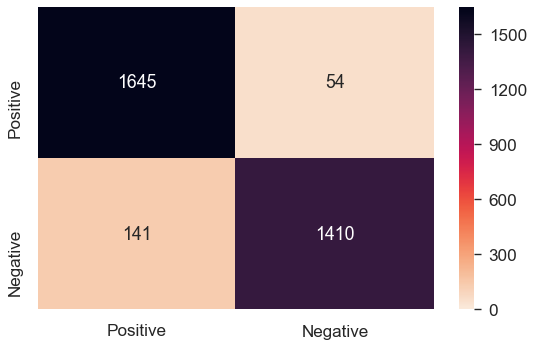

0.9090909090909091
0.9631147540983607
0.94


In [42]:
print(confusion_matrix(y_test,y_pred_NN))
print(classification_report(y_test,y_pred_NN))

cmap = sns.cm.rocket_r

figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap)
plt.show()

print(recall_score(y_test,y_pred_NN))
print(precision_score(y_test,y_pred_NN))
print(accuracy_score(y_test,y_pred_NN))

NN_df = pd.DataFrame({
                       "Model"           : ["Neural Network"],
                       "Accuracy_score"  : [accuracy_score(y_test,y_pred_NN)],
                       "Recall_score"    : [recall_score(y_test,y_pred_NN)],
                       "Precision"       : [precision_score(y_test,y_pred_NN)],
                       "f1_score"        : [f1_score(y_test,y_pred_NN)],
                       "Area_under_curve": [roc_auc_score(y_test, y_pred_NN)],
                       "Kappa_metric"    : [cohen_kappa_score(y_test,y_pred_NN)],
})

## 6. Model Comparison

In [43]:
# We used the model comparision function after each model to record model performance
# Now concatinating the all models to make a combined dataframe
model_comparison_df = pd.concat([LCV_model, RF_model,KNN_model, SVM_model, NN_df], ignore_index=True,axis= 0, sort= False)
display(model_comparison_df)

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression CV,0.959385,0.956802,0.958037,0.957419,0.959272,0.918596
1,Random Forest,0.937231,0.909091,0.957230,0.932540,0.936005,0.873925
2,K - Nearest Neighbours,0.939077,0.901354,0.968815,0.933868,0.937434,0.877529
3,Support Vector Machine,0.941846,0.910380,0.965800,0.937272,0.940476,0.883159
4,Neural Network,0.940000,0.909091,0.963115,0.935323,0.938654,0.879456


In [44]:
# Plotting Accuracy scores and Area under curve comparison plots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x = model_comparison_df['Accuracy_score'].tolist(),
    y = model_comparison_df['Model'].tolist(),
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Accuracy score of each model',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x= model_comparison_df['Area_under_curve'].tolist(), 
    y= model_comparison_df['Model'].tolist(),
    mode = 'lines+markers',
    line_color = 'rgb(128, 0, 128)',
    name = 'Area under curve of each model',
), 1, 2)

fig.update_layout(
    title='Area under curve and Accuracy score of Each model',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.05, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.1,
    ),
    legend=dict(x=0.029, y=1.038, font_size=8),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(model_comparison_df['Accuracy_score'].tolist(), decimals=3)
y_nw = np.rint(model_comparison_df['Accuracy_score'].tolist())

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, model_comparison_df['Model']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn ,
                            text='{:,}'.format(ydn) + 'M',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='red'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.08, y=-0.109,
                        text='Telco Churn Dataset"' +
                             '(Accessed on 05 March 2020)',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
# configure_plotly_browser_state()
fig.show()

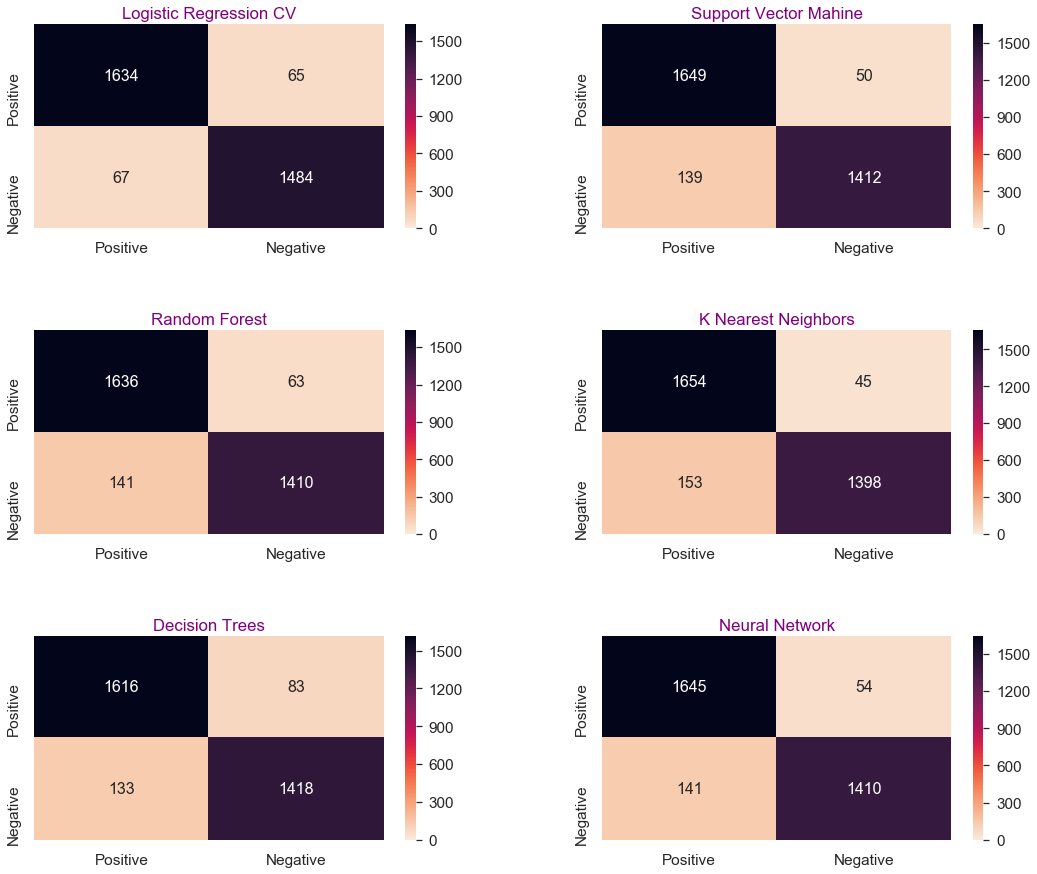

In [45]:
# Plotting all confusion matrix for all models
conf_df_LCV = pd.DataFrame(confusion_matrix(y_test,y_pred_LCV).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_SVC = pd.DataFrame(confusion_matrix(y_test,y_pred_SVC).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_RFC = pd.DataFrame(confusion_matrix(y_test,y_pred_RFC).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_KNN = pd.DataFrame(confusion_matrix(y_test,y_pred_knn).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_DT = pd.DataFrame(confusion_matrix(y_test,y_pred_DT).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_NN = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])

fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(18,15))
sns.heatmap(conf_df_LCV, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax1[0])
sns.heatmap(conf_df_SVC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax1[1])
sns.heatmap(conf_df_RFC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax2[0])
sns.heatmap(conf_df_KNN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax2[1])
sns.heatmap(conf_df_DT, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax3[0])
sns.heatmap(conf_df_NN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax3[1])

ax1[0].set_title('Logistic Regression CV', color = 'purple')
ax1[1].set_title('Support Vector Mahine', color = 'purple')
ax2[0].set_title('Random Forest', color = 'purple')
ax2[1].set_title('K Nearest Neighbors', color = 'purple')
ax3[0].set_title('Decision Trees', color = 'purple')
ax3[1].set_title('Neural Network', color = 'purple')


plt.subplots_adjust(wspace = .3,hspace = .5)
plt.show()


When comparing the classiffiers we can concentrate on two main aspects.

We see that the f1 score is highest for the Logistic Regression. As mentioned above, it is incredibly important for this specific classification endeavour that the number of false negatives, i.e. false edibles, is minimised. We can conclude then that also from this point of view, logistic regression is the best model. 

Looking at the f1 score, the model that performs worst is the Random Forest. However, concentrating on the FN rate, the worst model is K nearest neighbours, while it is as good as the Neural Network predicting true positives i.e. true poisonous mushrooms. 

Since the dataset is balanced, and the positive and negative class are almost equally distributed, accuracy is still a best performance metric. As we see Logistic Regression CV presents the higher accuracy and Random Forest is following.


SVM, Nearest Neighbor, Neural Network have quite similar performance. Nearest Neighbor treats all dimensions the same, the algorithm does not notice the importance of the features. Concerning the neural nets, since they are a ‘black box’ approach we cannot easily tell the underlying reasons it doesn't outperform.  Logistic regression is better since it is easier to fit and to interpet. For binary classification problems, logistic regression is very suitable to use. 

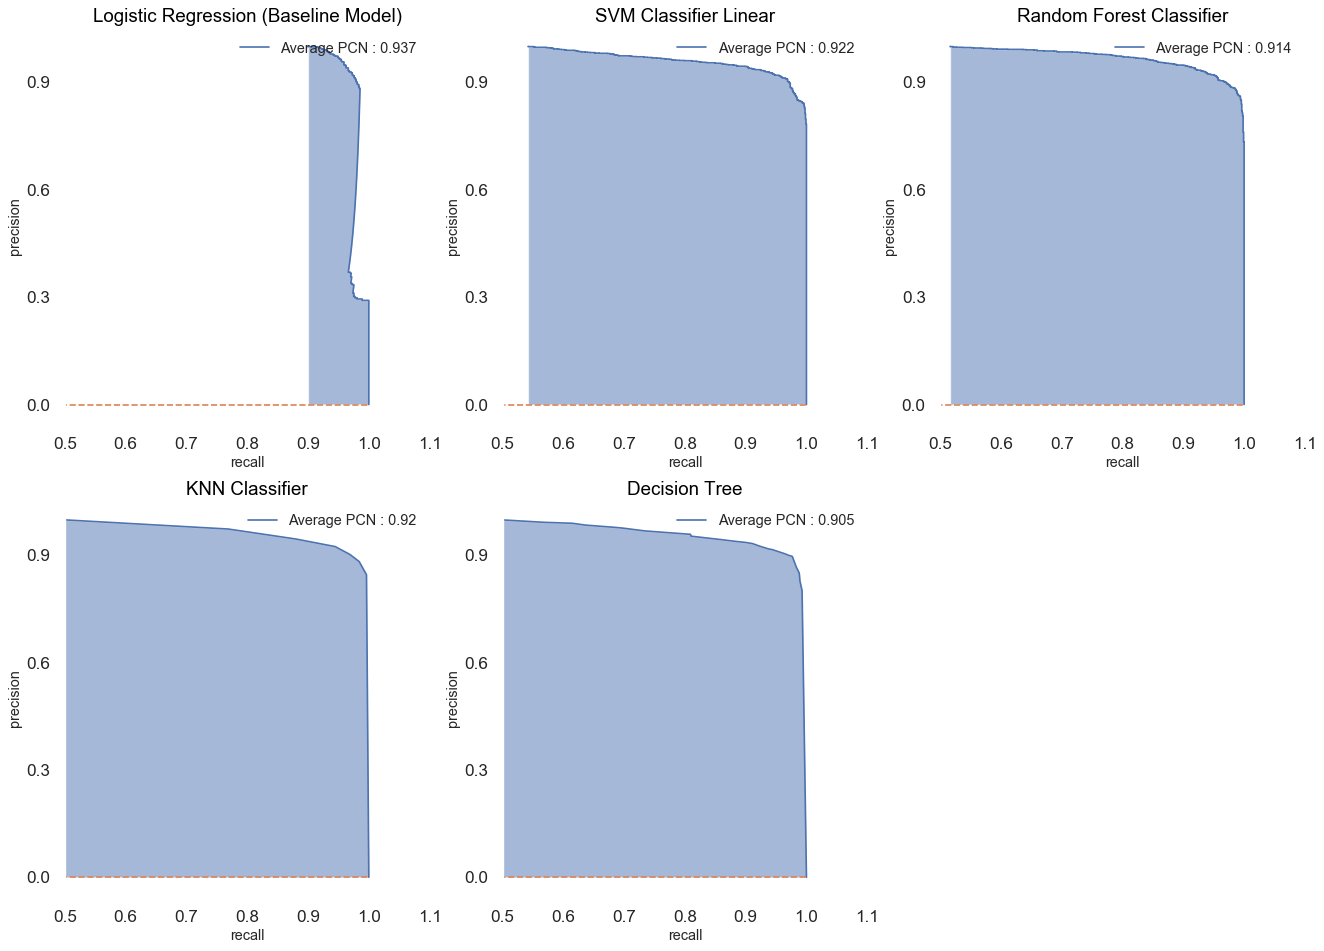

In [49]:
#Plotting all Precision Recall curves together. Acknowledgement must be given to Pavan for constructing the original method for plotting.

lst    = [model_LCV, model_SVC,model_RFC,model_KNN,model_DT]
length = len(lst)

mods   = ['Logistic Regression (Baseline Model)',
          'SVM Classifier Linear',
          'Random Forest Classifier',
          'KNN Classifier',
          'Decision Tree']
mods_lcv = ['Logistic Regression Baseline model']

figure(num=None, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')

for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    if i == model_LCV:
        probabilities = i.predict_proba(X_test_log)
        predictions   = i.predict(X_test_log)
        recall,precision,thresholds = precision_recall_curve(y_test_log,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("Average PCN : {}".format(np.around(average_precision_score(y_test_log,predictions),3))))
    else:
        probabilities = i.predict_proba(X_test)
        predictions   = i.predict(X_test)
        recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("Average PCN : {}".format(np.around(average_precision_score(y_test,predictions),3))))
    
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = 0.5)
    plt.legend(loc = "upper right",
               prop = {"size" : 13})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "black")
    plt.xlabel("recall",fontsize =13)
    plt.ylabel("precision",fontsize =13)
    plt.xlim([0.5,1.1])
    plt.yticks(np.arange(0,1.2,.3))

## 7. Conclusion

In this Project, we have sought out different ways to classify mushrooms between edible and poisnonous. We have firstly cleant the data by means of identifying the missing values and data manipulation. We have selected the most important features to concentrate on, looked in depth at the way the data is distributed and drawn conclusions from such observations. We then used different methods from Machine learning to classify the data, and finally compared them.